# DISRUPTIVE ARCHITECTURES: IOT, IOB & GENERATIVA IA
# Checkpoint Parte 2 - Classificação

## Integrantes:

#### Breno Lemes Santiago RM: 552270
#### Felipe Guedes Gonçalves RM: 550906
#### Luiz Fellipe Soares de Sousa Lucena RM: 551365
#### Nina Rebello Francisco RM: 99509
#### Vitória Maria de Camargo RM: 552344

Aprendizado Não Supervisionado - CLUSTERING / AGRUPAMENTO

O K-Means é um algoritmo de aprendizado de máquina não supervisionado que agrupa dados em um número k de clusters. O número de clusters é definido pelo usuário e o algoritmo tentará agrupar os dados mesmo que esse número não seja o ideal para o caso específico. Portanto, temos que criar uma técnica que nos ajude a decidir quantos clusters devemos usar para o modelo K-Means.

Referências:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

https://www.youtube.com/watch?v=FqIGui0rwh4 (How to Choose the Number of Clusters)

https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/

https://medium.com/pizzadedados/kmeans-e-metodo-do-cotovelo-94ded9fdf3a9

https://www.kaggle.com/code/eriveltonguedes/7-clusteriza-o-k-means-erivelton


In [117]:
# Importando os pacotes:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importando o algoritmo K-Means:
from sklearn.cluster import KMeans

# Métrica de avaliação para modelos de clustering:
from sklearn.metrics import silhouette_score

# Vamos utilizar o dataset Iris dentro do pacote datasets do sklearn:
from sklearn import datasets

# O pacote warnings inibe a visualização de avisos nos outputs do Colab.
import warnings
warnings.filterwarnings('ignore')

In [118]:
# Importando a base de dados
# Criamos a variável dados para receber o conjunto de dados
dados = pd.read_csv("/content/household_power_consumption.txt", sep=';', low_memory=False)
dados.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [119]:
dados.shape

(2075259, 9)

In [132]:
df = dados.sample(20000, random_state=19)

In [133]:
df = df.loc[:, ["Global_active_power", "Sub_metering_2"]]

In [134]:
df.head()

,Global_active_power,Sub_metering_2
1034899,1.454,0.000
59507,0.216,0.000
461109,0.276,0.000
946904,0.490,0.000
1419196,0.202,0.000


In [135]:
df.shape

(20000, 2)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1034899 to 1413634
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Global_active_power  20000 non-null  object
 1   Sub_metering_2       20000 non-null  object
dtypes: object(2)
memory usage: 468.8+ KB


In [137]:
# Visualizando as features:
df['Global_active_power']

1034899    1.454
59507      0.216
461109     0.276
946904     0.490
1419196    0.202
           ...  
221903     1.380
1444066    0.728
1263131    3.554
1270300    1.952
1413634    0.240
Name: Global_active_power, Length: 20000, dtype: object

In [138]:
# Visualizando o target:
df['Sub_metering_2']

1034899    0.000
59507      0.000
461109     0.000
946904     0.000
1419196    0.000
           ...  
221903     1.000
1444066    0.000
1263131    0.000
1270300    0.000
1413634    1.000
Name: Sub_metering_2, Length: 20000, dtype: object

In [139]:
df[df['Global_active_power'] == '?'].index

Int64Index([ 193546, 1988611, 1397925, 1985218, 1935081, 1933328, 1619568,
            1931336, 1988335, 1713645,
            ...
            1617744, 1931483, 1619413, 1930117, 1931123, 1930103, 1309852,
            1989034, 1618137, 1931599],
           dtype='int64', length=232)

In [140]:
df = df.drop(df[df['Global_active_power'] == '?'].index)
df

,Global_active_power,Sub_metering_2
1034899,1.454,0.000
59507,0.216,0.000
461109,0.276,0.000
946904,0.490,0.000
1419196,0.202,0.000
...,...,...
221903,1.380,1.000
1444066,0.728,0.000
1263131,3.554,0.000
1270300,1.952,0.000


In [141]:
df = df.astype('float64')
df

,Global_active_power,Sub_metering_2
1034899,1.454,0.0
59507,0.216,0.0
461109,0.276,0.0
946904,0.490,0.0
1419196,0.202,0.0
...,...,...
221903,1.380,1.0
1444066,0.728,0.0
1263131,3.554,0.0
1270300,1.952,0.0


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19768 entries, 1034899 to 1413634
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Global_active_power  19768 non-null  float64
 1   Sub_metering_2       19768 non-null  float64
dtypes: float64(2)
memory usage: 463.3 KB


In [93]:
# Criamos o dataframe df apenas com as colunas referentes às features:
#df = pd.DataFrame(dados, columns=["Global_active_power", "Sub_metering_2"])
#df

**Método Elbow**

O método Elbow é uma técnica muito popular e a ideia é executar o agrupamento k-means para um intervalo de clusters k (digamos de 1 a 10) e para cada valor, estamos calculando a soma das distâncias ao quadrado de cada ponto até seu centro atribuído (distorções).

In [143]:
df.replace('?', pd.NA, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.fillna(df.mean(), inplace=True)
df

,Global_active_power,Sub_metering_2
1034899,1.454,0.0
59507,0.216,0.0
461109,0.276,0.0
946904,0.490,0.0
1419196,0.202,0.0
...,...,...
221903,1.380,1.0
1444066,0.728,0.0
1263131,3.554,0.0
1270300,1.952,0.0


In [144]:
distorcoes = []
K = range(1,10)
for k in K:
    modelo01 = KMeans(n_clusters=k)
    modelo01.fit(df)
    distorcoes.append(modelo01.inertia_)

# Observação:
# O método "inertia_" permite calcular as distorções, ou seja,
# Soma das distâncias ao quadrado das amostras até o centro do cluster (centroides) mais próximo,
# ponderadas pelos pesos das amostras, se fornecidas

In [145]:
distorcoes

[740281.5552642827,
 116695.70161917953,
 61446.47572854647,
 38667.43784482838,
 27305.527682003718,
 21455.75232558097,
 17224.70235512763,
 13621.855374915256,
 11724.4085993777]

Observando a Curva de Elbow

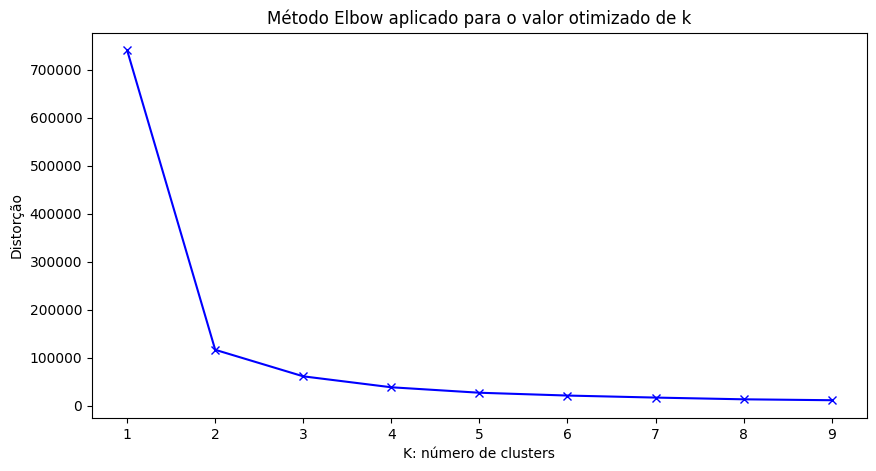

In [146]:
plt.figure(figsize=(10,5))
plt.plot(K, distorcoes, '-bx')

# Define os labels do eixos do gráfico:
plt.xlabel('K: número de clusters')
plt.ylabel('Distorção')

# Define um título para o gráfico:
plt.title('Método Elbow aplicado para o valor otimizado de k')

# Mostra o gráfico:
plt.show()

In [147]:
modelo_KMeans = KMeans(n_clusters=2)
modelo_KMeans.fit(df)

KMeans(n_clusters=2)

In [148]:
# A partir do modelo treinado, fazemos as predições dos clusters e criamos uma coluna chamada "k_means"
df['clusters'] =modelo_KMeans.predict(df)

In [149]:
df['clusters'].unique()

array([0, 1], dtype=int32)

In [150]:
# Adicionando a coluna "target" com os dados originais do dataset, para podermos comparar...
df['target'] = dados['Sub_metering_2']

In [151]:
df['target'] = pd.to_numeric(df['target'], errors='coerce')
df['target'].fillna(df['target'].mean(), inplace=True)

Text(0.5, 1.0, 'Clusters criados pelo algoritmo K_Means')

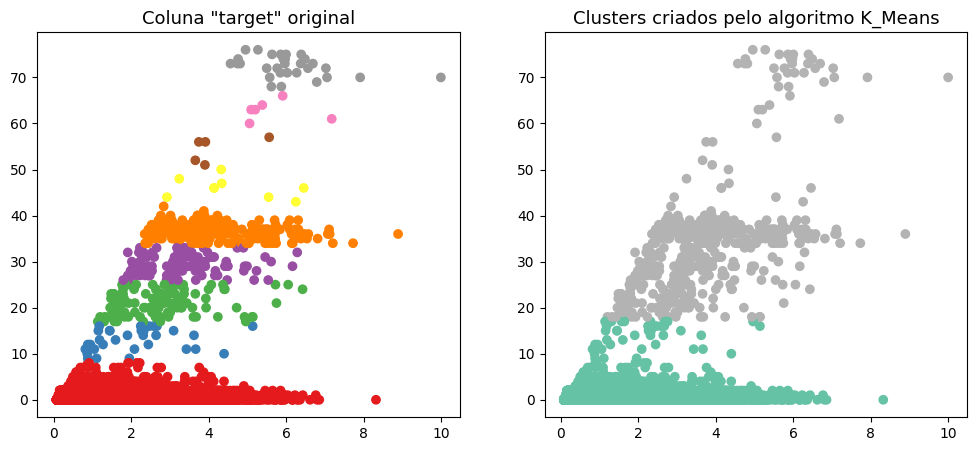

In [152]:
# Comparando graficamente os dados originais e a coluna de clusters criada pelo algoritmo K-Means
fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].scatter(df['Global_active_power'], df['Sub_metering_2'], c=df['target'], cmap=plt.cm.Set1)
axes[1].scatter(df['Global_active_power'], df['Sub_metering_2'], c=df['clusters'], cmap=plt.cm.Set2)
axes[0].set_title('Coluna "target" original', fontsize=13)
axes[1].set_title('Clusters criados pelo algoritmo K_Means', fontsize=13)

Avaliação do modelo de Clustering

Silhouette Score é uma ferramenta para avaliar a adequação dos resultados de agrupamento, fornecendo uma medida quantitativa de quão bem definidos e distintos são os agrupamentos.

Fontes de pesquisa:

https://www.educative.io/answers/what-is-silhouette-score

https://en.wikipedia.org/wiki/Silhouette_(clustering)



In [153]:
silhouette = silhouette_score(df, df['clusters'])
print(f"Silhouette score: {silhouette:.4f}")

Silhouette score: 0.9555
